In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/kdrama.csv")
df

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Live Up to Your Name,"Aug 12, 2017 - Oct 1, 2017",2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Heo Im, who is born in a concubine family in t...","Historical, Romance, Medical, Fantasy","Time Travel, Joseon Dynasty, Acupuncture, Stro...",Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,#246
246,Queen for Seven Days,"May 31, 2017 - Aug 3, 2017",2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,This drama is about the love story between Kin...,"Historical, Romance, Melodrama, Political","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",#247
247,Memory,"Mar 18, 2016 - May 7, 2016",2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,Park Tae Suk is a lawyer who finds out that he...,"Law, Romance, Life, Drama","Alzheimer's Disease, Teamwork, Bromance, Mothe...",Park Chan Hong,Kim Ji Woo,"Lee Sung Min, Kim Jee Soo, Park Jin Hee, Lee J...",MI Inc.,#248
248,A Korean Odyssey,"Dec 23, 2017 - Mar 4, 2018",2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","Horror, Comedy, Romance, Fantasy","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,#249


# **DATA CLEANING**

**Pengecekan Data**

Pengecekan Missing Values

In [4]:
print((df.isna().sum() / len(df)) * 100)

Name                    0.0
Aired Date              0.0
Year of release         0.0
Original Network        0.0
Aired On                0.0
Number of Episodes      0.0
Duration                0.0
Content Rating          2.0
Rating                  0.0
Synopsis                0.0
Genre                   0.0
Tags                    0.0
Director                0.4
Screenwriter            0.4
Cast                    0.0
Production companies    0.8
Rank                    0.0
dtype: float64


Duplicate Values

In [5]:
print(df.duplicated().sum())

0


# **Penangangan Data**

Missing Values

In [6]:
df.fillna({'Content Rating': "Unknown"}, inplace=True)

In [7]:
df.fillna({'Director': "Unknown"}, inplace=True)

In [8]:
df.fillna({'Screenwriter': "Unknown"}, inplace=True)

In [9]:
df.fillna({'Production Companies': "Unknown"}, inplace=True)

Pengecekan Missing Values

In [10]:
print((df.isna().sum() / len(df)) * 100)

Name                    0.0
Aired Date              0.0
Year of release         0.0
Original Network        0.0
Aired On                0.0
Number of Episodes      0.0
Duration                0.0
Content Rating          0.0
Rating                  0.0
Synopsis                0.0
Genre                   0.0
Tags                    0.0
Director                0.0
Screenwriter            0.0
Cast                    0.0
Production companies    0.8
Rank                    0.0
dtype: float64


In [11]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Name,0.0
Aired Date,0.0
Year of release,0.0
Original Network,0.0
Aired On,0.0
Number of Episodes,0.0
Duration,0.0
Content Rating,0.0
Rating,0.0
Synopsis,0.0


# **Visualisasi Data**

**Bar Chart**

Bar Chart Matpolib

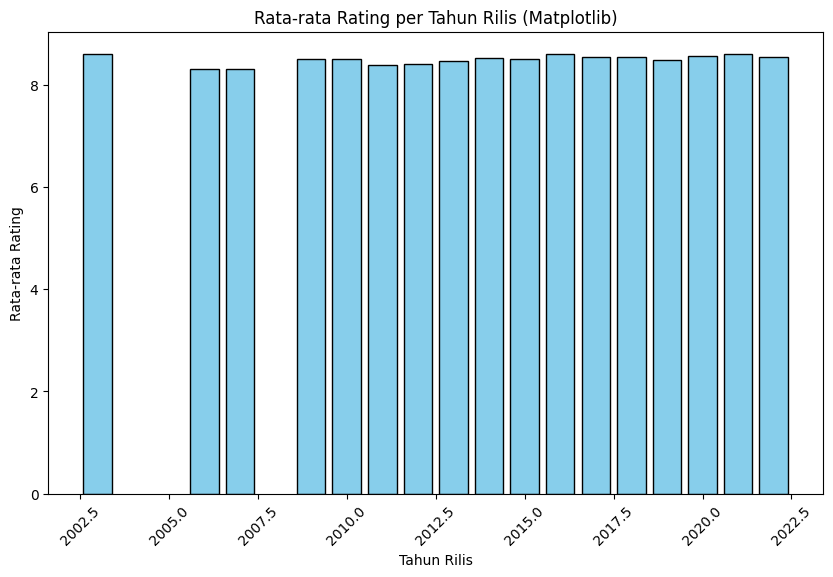

In [13]:
# Menghitung rata-rata rating per tahun rilis
rating_per_year = df.groupby("Year of release")["Rating"].mean().sort_index()

# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat bar chart dengan Matplotlib
plt.bar(rating_per_year.index, rating_per_year.values, color="skyblue", edgecolor="black")

# Menambahkan judul dan label
plt.title("Rata-rata Rating per Tahun Rilis (Matplotlib)")
plt.xlabel("Tahun Rilis")
plt.ylabel("Rata-rata Rating")
plt.xticks(rotation=45)

# Menampilkan chart
plt.show()

Bar Chart Seaborn

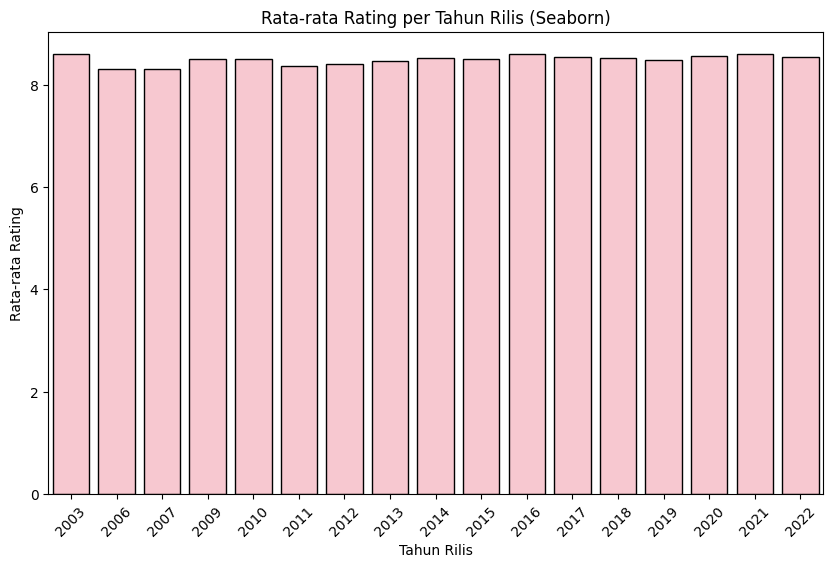

In [17]:
# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat bar chart dengan Seaborn
sns.barplot(x=rating_per_year.index, y=rating_per_year.values, color="pink", edgecolor="black")

# Menambahkan judul dan label
plt.title("Rata-rata Rating per Tahun Rilis (Seaborn)")
plt.xlabel("Tahun Rilis")
plt.ylabel("Rata-rata Rating")
plt.xticks(rotation=45)

# Menampilkan chart
plt.show()

**Pie Chart**

Pie Chart Matpolib

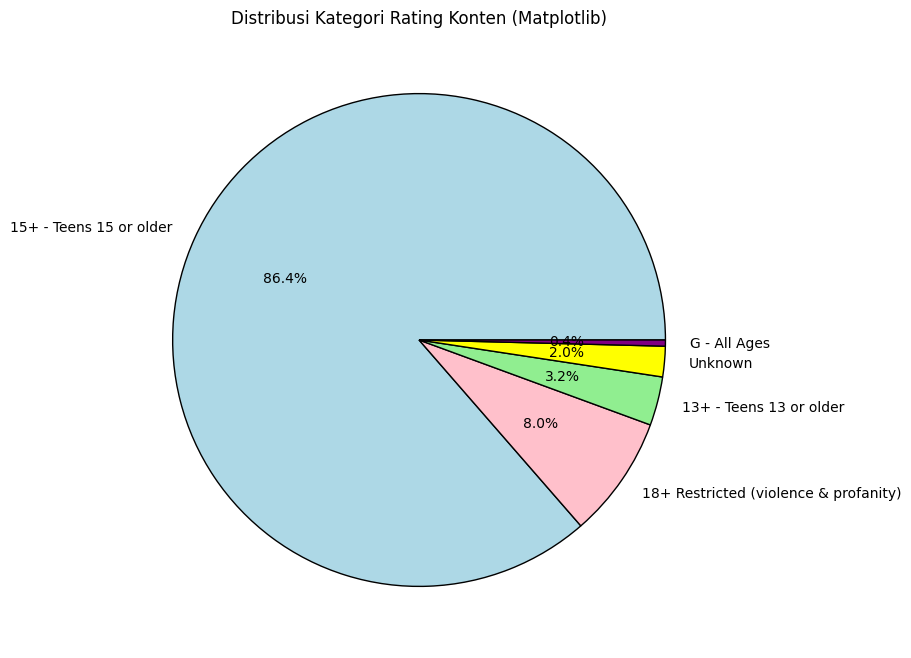

In [20]:
# Menghitung distribusi kategori rating konten
content_rating_counts = df["Content Rating"].value_counts()

# Membuat figure
plt.figure(figsize=(8, 8))

# Membuat pie chart dengan Matplotlib
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%', colors=["lightblue", "pink", "lightgreen","yellow","purple"],
        wedgeprops={'edgecolor': 'black'})

# Menambahkan judul
plt.title("Distribusi Kategori Rating Konten (Matplotlib)")

# Menampilkan chart
plt.show()

Pie Chart Seaborn

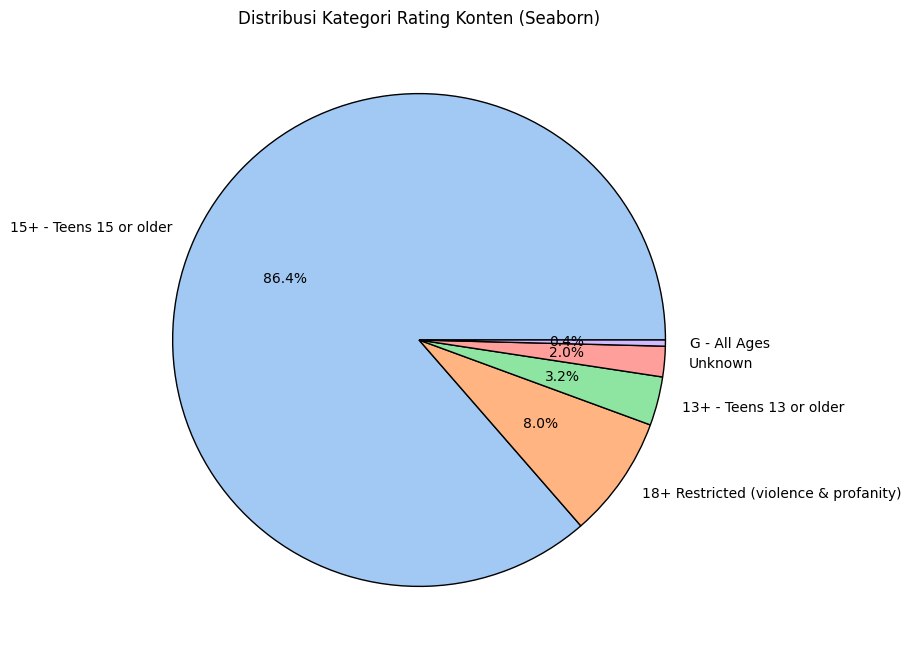

In [21]:
# Membuat figure
plt.figure(figsize=(8, 8))

# Menggunakan seaborn untuk warna
sns.set_palette("pastel")

# Membuat pie chart dengan Seaborn (menggunakan Matplotlib di belakang layar)
wedges, texts, autotexts = plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%',
                                   colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})

# Menambahkan judul
plt.title("Distribusi Kategori Rating Konten (Seaborn)")

# Menampilkan chart
plt.show()

**Line Chart**

Line Chart Matpolib

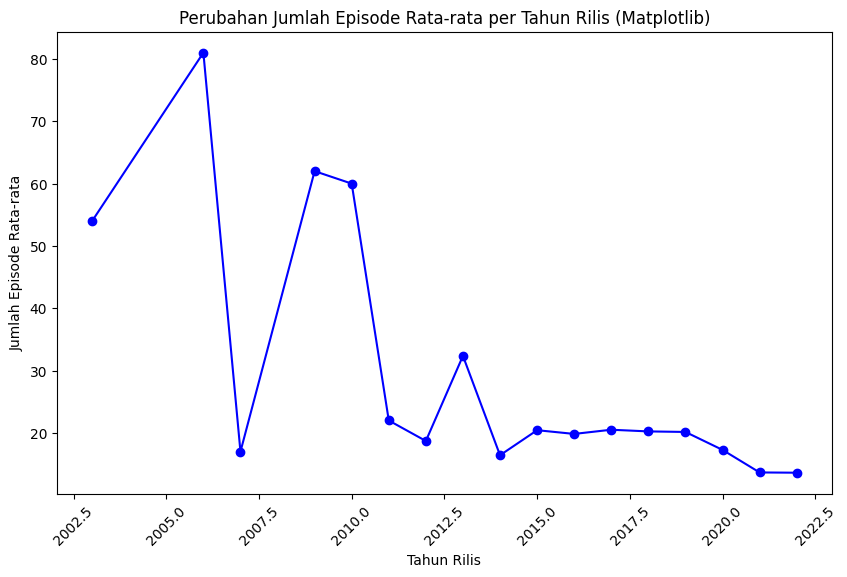

In [22]:
# Konversi jumlah episode ke numerik
df["Number of Episodes"] = pd.to_numeric(df["Number of Episodes"], errors='coerce')

# Menghitung rata-rata jumlah episode per tahun
episodes_per_year = df.groupby("Year of release")["Number of Episodes"].mean().sort_index()

# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat line chart dengan Matplotlib
plt.plot(episodes_per_year.index, episodes_per_year.values, marker="o", linestyle='-', color="blue")

# Menambahkan judul dan label
plt.title("Perubahan Jumlah Episode Rata-rata per Tahun Rilis (Matplotlib)")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Episode Rata-rata")
plt.xticks(rotation=45)

# Menampilkan chart
plt.show()

Line Chart Seaborn

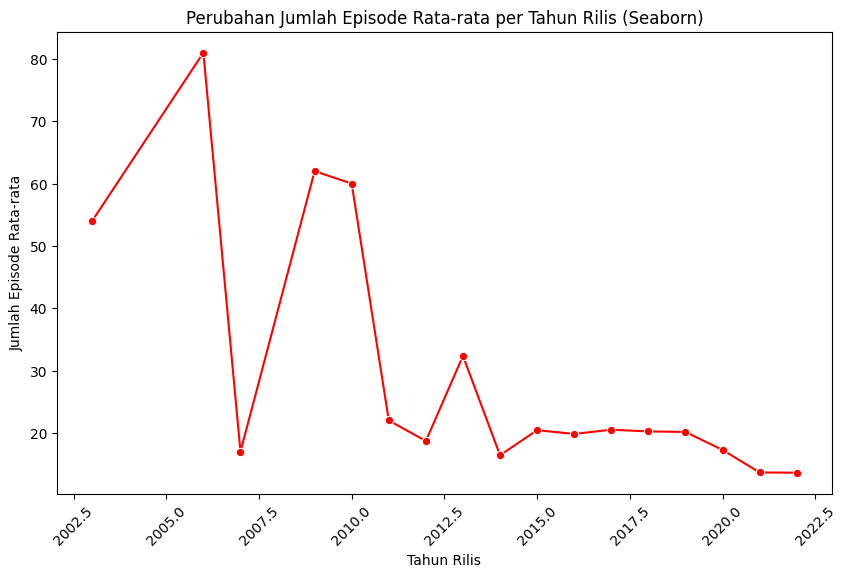

In [23]:
# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat line chart dengan Seaborn
sns.lineplot(x=episodes_per_year.index, y=episodes_per_year.values, marker="o", color="red")

# Menambahkan judul dan label
plt.title("Perubahan Jumlah Episode Rata-rata per Tahun Rilis (Seaborn)")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Episode Rata-rata")
plt.xticks(rotation=45)

# Menampilkan chart
plt.show()

**Histogram**

Histogram Matpolib

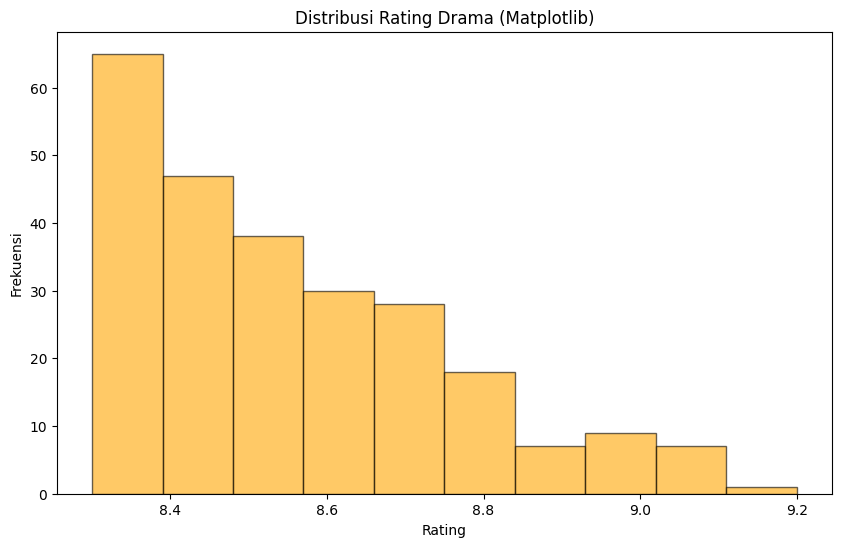

In [25]:
# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat histogram dengan Matplotlib
plt.hist(df["Rating"], bins=10, color="orange", alpha=0.6, edgecolor='black')

# Menambahkan judul dan label
plt.title("Distribusi Rating Drama (Matplotlib)")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")

# Menampilkan chart
plt.show()

Histogram Seaborn

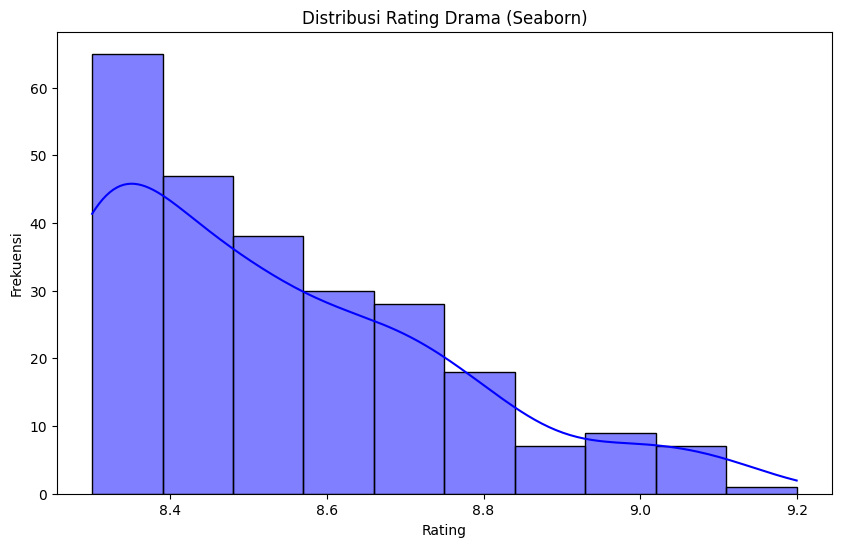

In [26]:
# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat histogram dengan Seaborn
sns.histplot(df["Rating"], bins=10, kde=True, color="blue", edgecolor='black')

# Menambahkan judul dan label
plt.title("Distribusi Rating Drama (Seaborn)")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")

# Menampilkan chart
plt.show()

# **Insight dan Tindakan**

1. Rata-rata Rating per Tahun Rilis (Bar Chart)

Insight: Tren rating bisa naik atau turun tiap tahun, mencerminkan kualitas produksi.

Tindakan: Analisis penyebab perubahan rating dan terapkan pola sukses dari tahun dengan rating tinggi.

2. Distribusi Kategori Rating Konten (Pie Chart)

Insight: Mayoritas drama mungkin menyasar usia tertentu (misalnya 13+)

Tindakan: Eksplorasi genre baru untuk menjangkau audiens lebih luas.

3. Perubahan Jumlah Episode per Tahun (Line Chart)

Insight: Tren episode bisa semakin pendek karena miniseries lebih populer.

Tindakan: Adaptasi ke format yang lebih sesuai dengan preferensi penonton.

4. Distribusi Rating Drama (Histogram)

Insight: Jika banyak drama ber-rating tinggi, kualitasnya stabil. Jika rating tersebar luas, ada variasi kualitas.

Tindakan: Gunakan data untuk meningkatkan kualitas produksi dan promosi drama terbaik.

# **Kesimpulan**

Industri K-Drama perlu terus mengevaluasi tren rating, jumlah episode, dan target audiens untuk mempertahankan daya tariknya.